Importing of the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [2]:
print(pd.__version__)

1.4.1


Reading the Data into a Dataframe.  And Returning the first 5 Rows.

In [3]:
df = pd.read_csv('./germany_housing_data_14.07.2020.csv')
df.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


The next cells, look at the size of the dataframe, its statistics, its types and the number of missing values for each column.

In [4]:
df.shape

(10552, 26)

In [5]:
df.describe()

,Unnamed: 0,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,10552.000000,1.055200e+04,10552.000000,10552.000000,5568.000000,10552.000000,6878.000000,8751.000000,7888.000000,9858.000000,5349.000000,2433.000000,8592.000000
mean,5275.500000,5.566851e+05,216.721008,1491.659004,134.300424,7.388978,4.169817,2.308993,2.283976,1958.821465,2010.706300,117.663111,2.698673
std,3046.244354,6.087410e+05,172.421321,8582.361675,188.814089,5.378126,2.577169,1.742330,0.821288,55.958072,10.548651,54.023207,3.195068
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2637.750000,2.500000e+05,130.000000,370.000000,48.000000,5.000000,3.000000,1.000000,2.000000,1935.000000,2006.000000,83.170000,1.000000
50%,5275.500000,4.052150e+05,176.775000,656.500000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,7913.250000,6.550000e+05,250.000000,1047.000000,150.250000,8.000000,5.000000,3.000000,3.000000,1996.000000,2018.000000,146.000000,3.000000
max,10551.000000,1.300000e+07,5600.000000,547087.000000,4034.000000,170.000000,61.000000,44.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10552 non-null  int64  
 1   Price                    10552 non-null  float64
 2   Type                     10150 non-null  object 
 3   Living_space             10552 non-null  float64
 4   Lot                      10552 non-null  float64
 5   Usable_area              5568 non-null   float64
 6   Free_of_Relation         6983 non-null   object 
 7   Rooms                    10552 non-null  float64
 8   Bedrooms                 6878 non-null   float64
 9   Bathrooms                8751 non-null   float64
 10  Floors                   7888 non-null   float64
 11  Year_built               9858 non-null   float64
 12  Furnishing_quality       7826 non-null   object 
 13  Year_renovated           5349 non-null   float64
 14  Condition             

What is the proportion of missing values for each column? And the absolut missing values?

In [7]:
df.isna().mean().sort_values()

Unnamed: 0                 0.000000
Price                      0.000000
Living_space               0.000000
Lot                        0.000000
Rooms                      0.000000
City                       0.000095
State                      0.000095
Place                      0.027483
Condition                  0.030610
Type                       0.038097
Heating                    0.055345
Year_built                 0.065770
Energy_certificate         0.071550
Energy_source              0.116281
Bathrooms                  0.170679
Garagetype                 0.185747
Garages                    0.185747
Floors                     0.252464
Furnishing_quality         0.258340
Energy_certificate_type    0.334155
Free_of_Relation           0.338230
Bedrooms                   0.348180
Energy_efficiency_class    0.456691
Usable_area                0.472328
Year_renovated             0.493082
Energy_consumption         0.769428
dtype: float64

In [8]:
df.isna().sum().sort_values()

Unnamed: 0                    0
Price                         0
Living_space                  0
Lot                           0
Rooms                         0
City                          1
State                         1
Place                       290
Condition                   323
Type                        402
Heating                     584
Year_built                  694
Energy_certificate          755
Energy_source              1227
Bathrooms                  1801
Garagetype                 1960
Garages                    1960
Floors                     2664
Furnishing_quality         2726
Energy_certificate_type    3526
Free_of_Relation           3569
Bedrooms                   3674
Energy_efficiency_class    4819
Usable_area                4984
Year_renovated             5203
Energy_consumption         8119
dtype: int64

Since there is only one row missing the city & state and there is no other information to infer these two columns I simply drop this one:

In [9]:
df.dropna(subset='City',inplace=True)

In the next cell I drop the Unnamed Index column. Furthermore the Energy_consumption and efficiency class is also dropped missing over 40% of the values.
Year renovated also misses more than 40% but I assume that the house was just not renovated. Also the usable area is missing more than 40%, but I assume those houses do not have a usable area.
Additionally all rows where all entries are missing are dropped (actually those are not existing in the dataset)

In [10]:
df.drop(['Unnamed: 0','Energy_consumption',
       'Energy_efficiency_class'],axis=1,inplace=True)
df.dropna(axis=0, how='all')

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,modernized,central heating,Gas,available,demand certificate,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,modernized,stove heating,NaN,not required by law,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,dilapidated,stove heating,"Fernwärme, Bioenergie",available,demand certificate,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,fixer-upper,central heating,Strom,available,demand certificate,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,refurbished,central heating,Öl,available,demand certificate,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,1495000.0,Special property,167.00,683.0,63.00,nach Vereinbarung,6.5,4.0,3.0,NaN,...,first occupation after refurbishment,stove heating,Fernwärme,available,consumption certificate,Bayern,München,Perlach,1.0,Garage
10548,449000.0,Mid-terrace house,222.00,4000.0,NaN,NaN,6.0,5.0,3.0,1.0,...,dilapidated,oil heating,Erdwärme,available,demand certificate,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot
10549,678000.0,Mid-terrace house,142.00,377.0,NaN,31.07.2021,4.0,3.0,NaN,NaN,...,dilapidated,central heating,NaN,NaN,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage
10550,419900.0,Mid-terrace house,120.83,501.0,NaN,sofort,5.0,NaN,1.0,2.0,...,NaN,stove heating,NaN,available,demand certificate,Sachsen-Anhalt,Börde (Kreis),Wolmirstedt,1.0,Garage


Here I define two lambda functions which can be used to fill missing columns with the mean, or for categorical variables with the mode.

In [11]:
fill_mean = lambda col: col.fillna(col.mean())
fill_mode = lambda col: col.fillna(col.mode()[0])

# Q1: What is the most common type of house?
To answer this question we simply can count each of its occurances. There are several missing values, since I know that this field is a drop down, people must probably not have found a house type close to its. Therefore I fill all the NANs with "Others" and do not imply anything here. Looking at the value counts one can see that the Mid-terrace house ist the most common, and a castle is the least common one.

In [12]:
df.Type.value_counts()

Mid-terrace house       4323
Duplex                  2127
Single dwelling         1169
Farmhouse                573
Villa                    396
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 249
Corner house             201
Castle                     7
Name: Type, dtype: int64

In [13]:
df.Type.fillna('Others',inplace=True)
df.Type.value_counts()

Mid-terrace house       4323
Duplex                  2127
Single dwelling         1169
Farmhouse                573
Others                   402
Villa                    396
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 249
Corner house             201
Castle                     7
Name: Type, dtype: int64

Plotting the value counts as a horizontal bar chart with title.

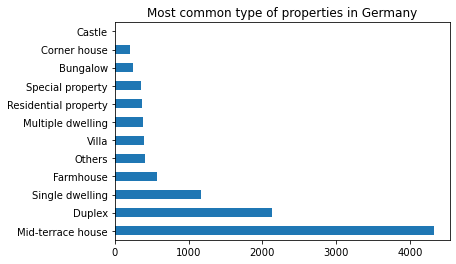

In [14]:
df.Type.value_counts().plot(kind='barh',align='center',title='Most common type of properties in Germany');

# Q2: What is the most expensive federal state in Germany?

For this question, I look at the mean house prices of the different federal state and at the price per square meter living area. Since this information is not in the data set I calculate it at first by diving the price by living space.
Since prices and living space do not have any missing values, I do not need to clean any data. For the sake of convenience and display I put the information in a separate display.

In [15]:
df['Price/qm']=df['Price']/df['Living_space']

In [16]:
pd.options.display.float_format = '{:,.0f}'.format
df_price = df.groupby(['State']).Price.mean().sort_values(ascending=False).to_frame()
df_price['Price/qm']=df.groupby(['State'])['Price/qm'].mean()
df.drop(axis=1,labels='Price/qm',inplace=True)

In [17]:
df_price

,Price,Price/qm
State,,
Berlin,"1,160,439","5,215"
Hamburg,"835,454","5,076"
Bayern,"820,002","3,881"
Baden-Württemberg,"708,397","3,493"
Hessen,"667,460","2,994"
Brandenburg,"564,342","2,886"
Nordrhein-Westfalen,"558,275","2,607"
Schleswig-Holstein,"541,217","3,692"
Bremen,"429,788","2,855"


# Q3 Where in Germany are the biggest lots sold?
As one expect in the smaller city states the los are way smaller than in the "normal" States.

In [18]:
df.groupby('State').Lot.mean().sort_values(ascending=False).to_frame()

,Lot
State,
Mecklenburg-Vorpommern,"3,855"
Schleswig-Holstein,"2,118"
Brandenburg,"1,977"
Bayern,"1,692"
Sachsen,"1,653"
Niedersachsen,"1,529"
Nordrhein-Westfalen,"1,321"
Thüringen,"1,310"
Baden-Württemberg,"1,278"


In [19]:
df.groupby('State').Living_space.mean().sort_values(ascending=False).to_frame()

,Living_space
State,
Thüringen,251
Mecklenburg-Vorpommern,243
Sachsen,241
Nordrhein-Westfalen,229
Hessen,226
Baden-Württemberg,224
Bayern,222
Berlin,221
Rheinland-Pfalz,213


# Q4 Can I predict the real estate prices?
Short answer: No not so good. 

Long answer in the next couple of steps.
First missing values need to be handled.

### Handling Missing Values
There are several missing values which must be handled first before using a moedel.

In [20]:
df.isna().sum().sort_values()

Price                         0
Type                          0
Living_space                  0
Lot                           0
City                          0
Rooms                         0
State                         0
Place                       289
Condition                   323
Heating                     584
Year_built                  694
Energy_certificate          755
Energy_source              1226
Bathrooms                  1801
Garagetype                 1959
Garages                    1959
Floors                     2663
Furnishing_quality         2725
Energy_certificate_type    3525
Free_of_Relation           3569
Bedrooms                   3674
Usable_area                4983
Year_renovated             5202
dtype: int64

Since place and city is quite a specific geographical attribute this one is dropped for the sake of convenience. Also free of relation is quite difficult to impute.

In [21]:
df.drop(axis=1,labels=['Place','City','Free_of_Relation']  ,inplace=True)

Looking at all categorical variables by nature (string).

In [22]:
df.select_dtypes(include=['object']).columns

Index(['Type', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source',
       'Energy_certificate', 'Energy_certificate_type', 'State', 'Garagetype'],
      dtype='object')

For the furnishing quality I set the mode, which is normal. This is probably a good guess in terms of rating. Most people are quite modes but on the other hand they do not put something worse. So normal seems to be quite a good fit.

In [23]:
df.Furnishing_quality.value_counts()

normal     3734
basic      2690
refined     914
luxus       488
Name: Furnishing_quality, dtype: int64

In [24]:
df.Furnishing_quality.fillna(df.Furnishing_quality.mode()[0], inplace=True)

The Energy source was sometimes a list of several energy sources, assuming that the first one was the main energy source. I split the list and only used the first one as energy source. The missing ones are filled with the most common one e.g. Gas in this case.

In [25]:
df.Energy_source=df.Energy_source.str.split(pat=',',expand= True)[0].str.strip()
df.Energy_source.fillna(df.Energy_source.mode()[0], inplace=True)


The missing Heating is also filled with the mode.

In [26]:
df.Heating.fillna(df.Heating.mode()[0], inplace=True)


The energy certificate is a requirement by law for most of the properties. So for the missing values I assume its just available.
Also the most common one is the demand consumption certificate thats why I fill all the missing certificate types with the demand certificate

In [27]:
df.Energy_certificate.fillna('available',inplace=True)
df.Energy_certificate.value_counts()

available                   7742
not required by law         1588
available for inspection    1221
Name: Energy_certificate, dtype: int64

In [28]:
df.Energy_certificate_type.fillna('demand certificate',inplace=True)
df.Energy_certificate_type.value_counts()

demand certificate         7668
consumption certificate    2883
Name: Energy_certificate_type, dtype: int64

The condition is not specified. This is probably a feature which one sees best by looking at the pictures. Since we do not know anything abouth the condition we just fill it with not specified.

In [29]:
df.Condition.fillna('not specified',inplace=True)

Since Garages and Garage Type are a important feature for buyers this is normally listed if there is a garage, therefore I assume if nothing is listed that there is none and fill all the values with zero, respectively None.
The same goes for the usable area and the Year_renovated.

In [30]:
df.Garages.fillna(0,inplace=True)
df.Garagetype.fillna("None",inplace=True)
df.Usable_area.fillna(0,inplace=True)
df.Year_renovated.fillna(0,inplace=True)

For the remaining missing numeric variables i just fill in the mean value. Since everyhouse needs to have a bedroom or a bathroom, or a year in which it was built.

In [31]:
missing_num =df.select_dtypes(include=['float','int']).columns[df.select_dtypes(include=['float','int']).isna().sum()>0]
for i in missing_num:
    df[i].fillna(df[i].mean(),inplace=True)

Now there are now missing values left and one can generate the dummy variables.

In [32]:
df.isna().sum().sort_values()

Price                      0
State                      0
Energy_certificate_type    0
Energy_certificate         0
Energy_source              0
Heating                    0
Condition                  0
Year_renovated             0
Furnishing_quality         0
Year_built                 0
Floors                     0
Bathrooms                  0
Bedrooms                   0
Rooms                      0
Usable_area                0
Lot                        0
Living_space               0
Type                       0
Garages                    0
Garagetype                 0
dtype: int64

### Setting up the linear model
    

Setting up the response variable and the explanatory variable. Then dividing it into a training set and a test set.

In [33]:
y = df['Price']
X_all = df.drop('Price',axis=1)
cat_vars=X_all.select_dtypes(include=['object']).columns
for cat in cat_vars:
    X_all=pd.concat([X_all.drop(cat,axis=1),pd.get_dummies(X_all[cat], prefix=cat, prefix_sep='_', drop_first=True)], axis=1)
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all,y,test_size=0.3, random_state = 10)

In [34]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_all_train,y_train)

C:\Users\Q377613\Anaconda3\envs\dashboard\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [35]:
y_test_preds = lm_model.predict(X_all_test)
y_train_preds = lm_model.predict(X_all_train)
    
test_score = r2_score(y_test,y_test_preds)
train_score = r2_score(y_train,y_train_preds)

In [36]:
test_score

-1.211774481722312e+25

In [37]:
train_score

0.45418107570606625

In [38]:
mean_squared_error(y_train,y_train_preds,squared=False)

449541.1319813938

The result is not very good. Probably due to overfitting. I will make a selection of features which are very like to be useful in prediction of the prices

In [39]:
X_reduced = df[['Living_space','Rooms','Lot','Type','Bedrooms','Usable_area','Bathrooms','Condition','Year_built','Year_renovated','State','Garages']]
cat_vars=X_reduced.select_dtypes(include=['object']).columns
for cat in cat_vars:
    X_reduced=pd.concat([X_reduced.drop(cat,axis=1),pd.get_dummies(X_reduced[cat], prefix=cat, prefix_sep='_', drop_first=True)], axis=1)
X_reduced_train,  X_reduced_test, y_train, y_test = train_test_split( X_reduced,y,test_size=0.3, random_state = 10)

In [40]:
lm_model_red = LinearRegression(normalize=True)
lm_model_red.fit(X_reduced_train,y_train)

C:\Users\Q377613\Anaconda3\envs\dashboard\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [41]:
y_test_preds_red = lm_model_red.predict(X_reduced_test)
y_train_preds_red = lm_model_red.predict(X_reduced_train)
    
test_score_red = r2_score(y_test,y_test_preds_red)
train_score_red = r2_score(y_train,y_train_preds_red)

In [42]:
test_score_red

0.3632875370175145

In [43]:
train_score_red

0.40377585402324045

In [44]:
mean_squared_error(y_train,y_train_preds_red,squared=False)

469839.9269726411

This result is even worse regarding the mean squared error
